## Exploratory Analysis on Titanic Dataset

<a id="cont"></a>

## Table of Contents
<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages & Loading the Data</a>

<a href=#three>3. Data Overview & Data Cleaning</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>


The Titanic dataset is popular for data analysis and machine learning. It contains information about the passengers onboard the Titanic, including features like Name, age, gender, fare, cabin, and survival status. I will perform Exploratory Data Analysis (EDA) on the Titanic dataset using Python in this project.

**Dataset**

The dataset Titanic is available in Seaborn under the name titanic. It contains the following columns:

- Survived: Survival status (0 = No, 1 = Yes)
- Pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
- Sex: Passenger’s gender (male/female)
- Age: Passenger’s age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Fare: Fare paid for the ticket
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- Name: Passengers names

 <a id="two"></a>
## 2. Importing Packages & Loading Data
<a href=#cont>Back to Table of Contents</a>

#### **2.1. Importing Packages**:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **2.2. Loading Data**:

In [3]:
df = pd.read_csv('tested.csv')

<a id="three"></a>
## 3. Data Overview & Data Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.shape

(418, 12)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Cleaning
- Missing Values
- Duplicates

In [12]:
df_cleaning = df.copy()

In [13]:
df_cleaning.duplicated().sum()

0

There are no duplicates in the data

In [14]:
df_cleaning.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
((df_cleaning.isna().mean())*100).round()

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            21.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          78.0
Embarked        0.0
dtype: float64

We can see that **Age, Cabin** and **Fare** have missing values
As we can see, about 78 % of Cabin coulmms are missing. For that we need to drop this columns

In [16]:
df_cleaning = df_cleaning.drop(columns= ["Cabin"])
df_cleaning.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [17]:
age_missing_df = df_cleaning[df_cleaning["Age"].isna()]
age_missing_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,S
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,S
29,921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,C
33,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,S
36,928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,S


In [18]:
age_missing_df["SibSp"].value_counts()

0    69
1    13
2     3
8     1
Name: SibSp, dtype: int64

In [19]:
age_missing_df["Survived"].value_counts()

0    61
1    25
Name: Survived, dtype: int64

In [20]:
age_missing_df["Sex"].value_counts()

male      61
female    25
Name: Sex, dtype: int64

In [21]:
age_missing_df["Parch"].value_counts()

0    77
2     4
9     2
1     2
4     1
Name: Parch, dtype: int64

As we can see most of passengers who are alone, have there age missing.

In [22]:
df_cleaning["Age"] = df_cleaning["Age"].fillna(df_cleaning["Age"].median())

In [23]:
df_cleaning.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [24]:
df_cleaning[df_cleaning["Fare"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [25]:
df_cleaning[df_cleaning["Pclass"] == 3].groupby("Embarked")["Fare"].mean() 

# The mean of the 3 class fare by where they are Embarked

Embarked
C    10.658700
Q     8.998985
S    13.913030
Name: Fare, dtype: float64

In [27]:
df_cleaning.loc[df_cleaning["PassengerId"]==1044, "Fare"] = 13.9130 

# We replace Fare of Passenger 1044 by the mean fare of the 3 class who embark in S = Southampton

In [28]:
df_cleaning.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now, there are no missing values anymore.

#### Next, we choose relevant columns

In [29]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [30]:
df_cleaning.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [32]:
columns = ["Survived", 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch','Fare', 'Embarked']
target_columns = "Survived"
numerical_columns = ["Age", "SibSp", "Parch", "Fare"]
categorical_columns = ["Sex", "Embarked", "Pclass"]
df_cleaning = df_cleaning[columns]
df_cleaning.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


#### Numerical Columns Distribution

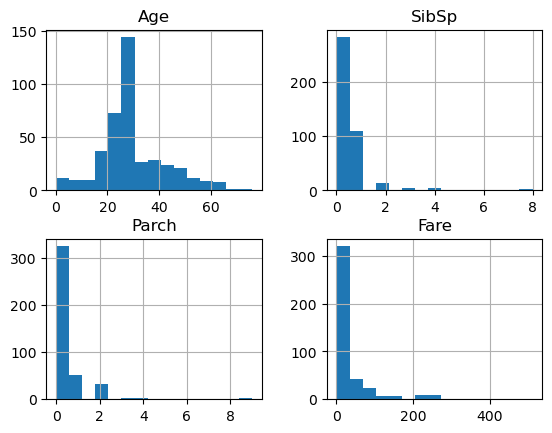

In [34]:
_ = df_cleaning[numerical_columns].hist(bins = 15)

This shows that most of the passenger are alone. Also, the age distribution seam to be normal.

In [35]:
#plt.style.available
plt.style.use("seaborn-v0_8-whitegrid")

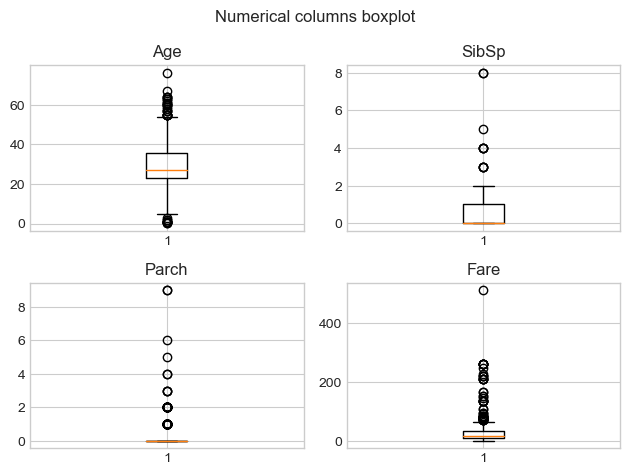

In [37]:
fig, axs = plt.subplots(2, 2)
for col, ax in zip(numerical_columns, axs.flatten()):
    ax.boxplot(df_cleaning[col])
    ax.set_title(col)
fig.suptitle("Numerical columns boxplot")
plt.tight_layout()

The boxplot confirms that the most passenger came alone and their Fare are cheap. Now, Let look at the few people for which the fare is very expensive

In [38]:
qt_25 = df_cleaning["Fare"].quantile(0.25)
qt_75 = df_cleaning["Fare"].quantile(0.75)
IQR = qt_75-qt_25
print(qt_25, qt_75, IQR)

7.8958 31.471875 23.576075


In [40]:
condition = (df_cleaning['Fare']<(qt_25-1.5*IQR)) | (df_cleaning['Fare']>(qt_75+1.5*IQR))
print(condition)
expensive_fare_raws = df_cleaning[condition]
expensive_fare_raws.head()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414     True
415    False
416    False
417    False
Name: Fare, Length: 418, dtype: bool


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,1,female,23.0,1,0,82.2667,S
24,1,1,female,48.0,1,3,262.3750,C
48,1,1,female,60.0,0,0,76.2917,C
53,1,1,female,28.0,3,2,263.0000,S
59,1,1,female,36.0,0,0,262.3750,C


In [41]:
expensive_fare_raws.shape

(55, 8)

In [42]:
expensive_fare_raws

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,1,female,23.0,1,0,82.2667,S
24,1,1,female,48.0,1,3,262.3750,C
48,1,1,female,60.0,0,0,76.2917,C
53,1,1,female,28.0,3,2,263.0000,S
59,1,1,female,36.0,0,0,262.3750,C
64,0,1,male,13.0,2,2,262.3750,C
69,1,1,female,60.0,1,4,263.0000,S
74,1,1,female,35.0,0,0,211.5000,C
75,0,1,male,32.5,0,0,211.5000,C
81,0,1,male,67.0,1,0,221.7792,S


In [43]:
expensive_fare_raws["Pclass"].value_counts()

1    49
3     4
2     2
Name: Pclass, dtype: int64

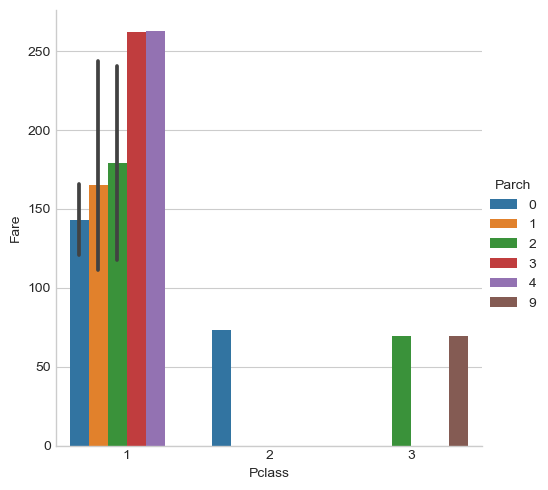

In [44]:
sns.catplot(x="Pclass", y="Fare", data=expensive_fare_raws, kind= "bar", hue="Parch")

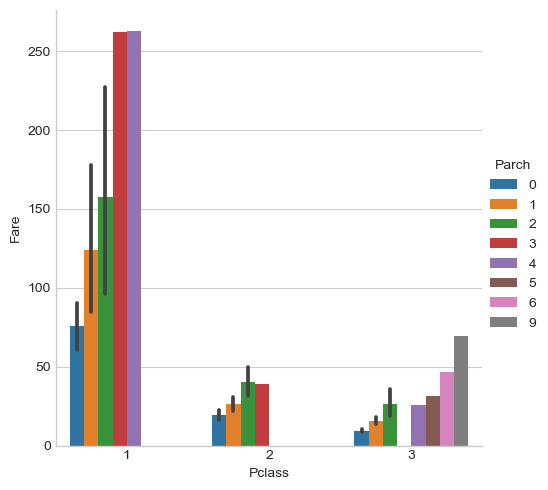

In [46]:
sns.catplot(x="Pclass", y="Fare", data=df_cleaning, kind= "bar", hue="Parch")

Here, some passengers in 3 class pay expensive fare. As we can see in the graph, these passengers have more parent aboard.
So, The more parent the passenger have the more expensive is the fare

#### Target Columns

In [47]:
df_cleaning["Survived"].value_counts(normalize=True)

0    0.636364
1    0.363636
Name: Survived, dtype: float64

Here, we can see that only 36% Survived.

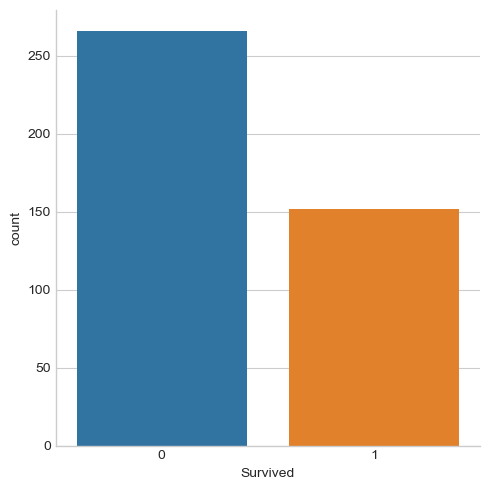

In [48]:
sns.catplot(x = "Survived", data= df_cleaning, kind="count")

#### Categorical Variables

In [49]:
df_cleaning["Pclass"].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [50]:
df_cleaning["Sex"].value_counts(normalize=True)

male      0.636364
female    0.363636
Name: Sex, dtype: float64

Here, we can that there are more males aboard than females.
Now, lets add new class for child (Age less than 14) And change this columns to status : man , woman, child

In [51]:
df_cleaning = df_cleaning.rename(columns={"Sex":"Status"})
df_cleaning

,Survived,Pclass,Status,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,27.0,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,27.0,0,0,8.0500,S


In [52]:
df_cleaning['Status'] = np.where(df_cleaning["Age"] <= 10, "child", df_cleaning["Status"])
df_cleaning['Status'].value_counts()

male      254
female    142
child      22
Name: Status, dtype: int64

In [53]:
df_cleaning["Status"] = df_cleaning["Status"].replace({"male":"man", "female":"woman"})

In [54]:
df_cleaning["Status"].value_counts(normalize=True)

man      0.607656
woman    0.339713
child    0.052632
Name: Status, dtype: float64

#### Relationship with target column

In [55]:
df_cleaning.groupby("Status")["Survived"].value_counts()

Status  Survived
child   0            12
        1            10
man     0           254
woman   1           142
Name: Survived, dtype: int64

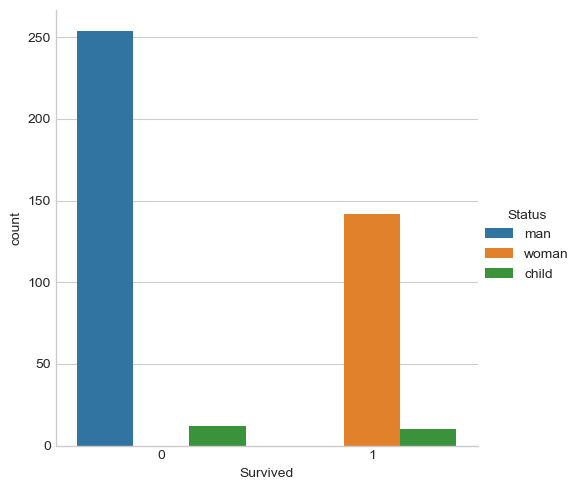

In [56]:
sns.catplot(x="Survived", data=df_cleaning, kind="count", hue="Status")

In [57]:
survive_status_tab = pd.crosstab(index=df_cleaning["Survived"], columns=df_cleaning["Status"])
survive_status_tab

Status,child,man,woman
Survived,,,
0,12,254,0
1,10,0,142


<Axes: xlabel='Status', ylabel='Survived'>

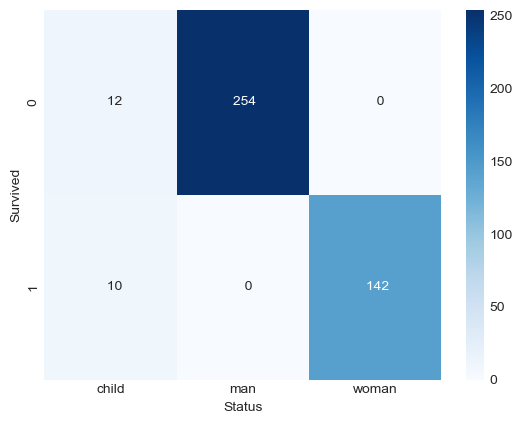

In [58]:
sns.heatmap(survive_status_tab, annot=True,fmt="4d", cmap="Blues")

Here, it is incredible that no man survived and all women survived, but some child died.

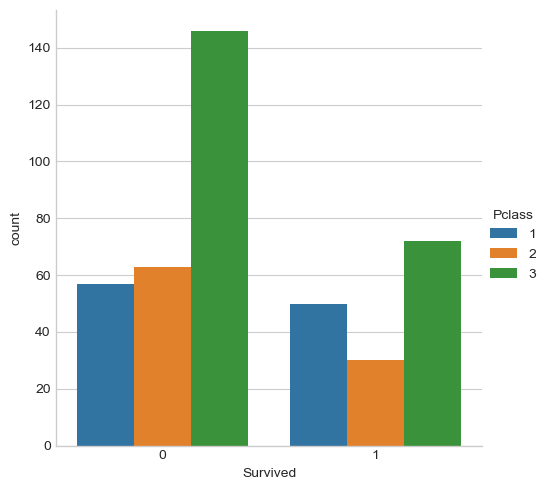

In [59]:
sns.catplot(x="Survived", data=df_cleaning, kind="count", hue="Pclass")

In [60]:
survive_pclass_tab = pd.crosstab(index=df_cleaning["Survived"], columns=df_cleaning["Pclass"], normalize="columns")
survive_pclass_tab

Pclass,1,2,3
Survived,,,
0,0.53271,0.677419,0.669725
1,0.46729,0.322581,0.330275


<Axes: xlabel='Pclass', ylabel='Survived'>

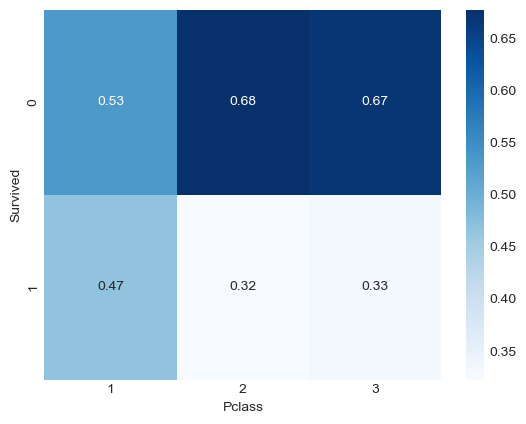

In [61]:
sns.heatmap(survive_pclass_tab, annot=True,fmt=".2f", cmap="Blues")

Here, close to 2/3 of 3 and 2 class died and 50% survived

In [62]:
survive_embarked_tab = pd.crosstab(index=df_cleaning["Survived"], columns=df_cleaning["Embarked"], normalize="columns")
survive_embarked_tab

Embarked,C,Q,S
Survived,,,
0,0.607843,0.478261,0.674074
1,0.392157,0.521739,0.325926


<Axes: xlabel='Embarked', ylabel='Survived'>

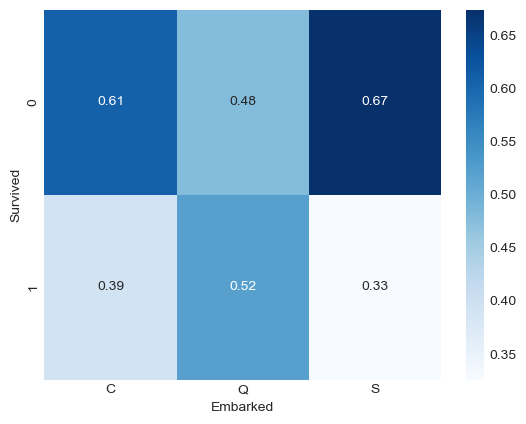

In [63]:
sns.heatmap(survive_embarked_tab, annot=True,fmt=".2f", cmap="Blues")

##### So far, in summary, we can say that:
    
-All women survived (over 10 old)
-The 50% of child (less than 10 old) died
-All man (over 10 old) died
-More proportion of the first class survived than the second and third class (50% 68% and 67% respectively)
-Some passengers fare are hight due the number of parents aboard and the class
-More proportion of peaple emberked in Queenstown (52%) survived

### Next, let's look at some more analysis

In [65]:
df["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: ylabel='Density'>

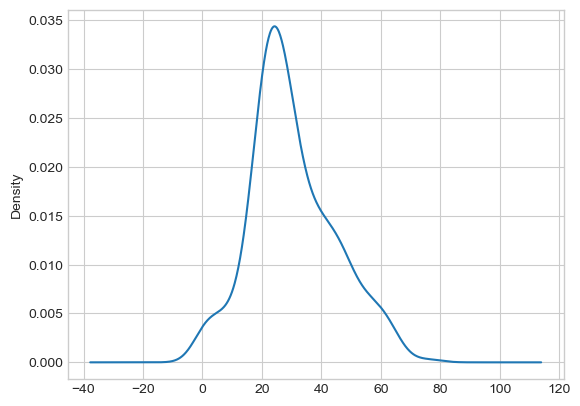

In [66]:
df["Age"].plot(kind = "kde")

In [67]:
df["Age"].skew()

0.4573612871503845

<Axes: xlabel='Age'>

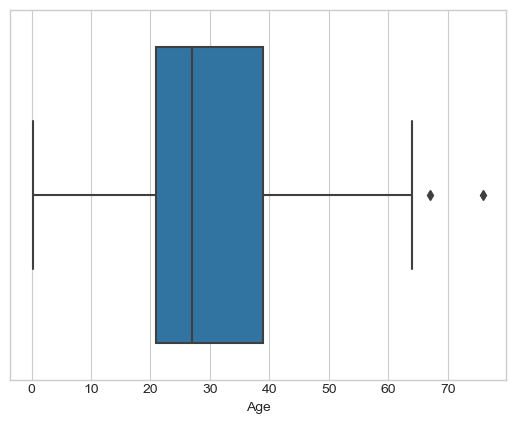

In [68]:
sns.boxplot(x = "Age", data = df)

In [69]:
df["Age"].isnull().sum()/len(df["Age"])

0.20574162679425836

In [70]:
df["Age"].fillna(df["Age"].median(), inplace=True)

For **Fare**, 

- The data is highly(positively)skewed
- Fare col actually contains the group fare and not the individual fare(This migth be and issue )
- We need to create a new col called individual fare

In [71]:
df["Fare"].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

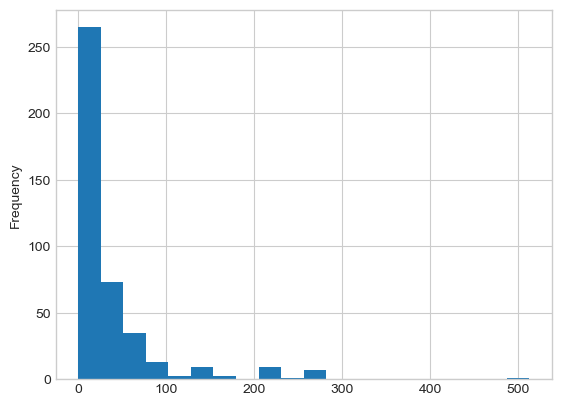

In [72]:
df["Fare"].plot(kind = "hist",bins = 20)

<Axes: ylabel='Density'>

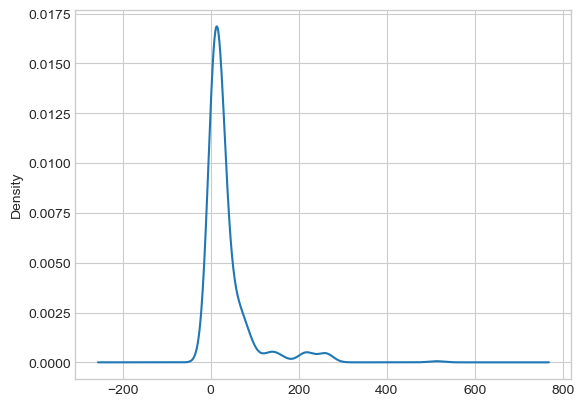

In [73]:
df["Fare"].plot(kind = "kde")

In [74]:
df["Fare"].skew()

3.6872133081121405

<Axes: xlabel='Fare'>

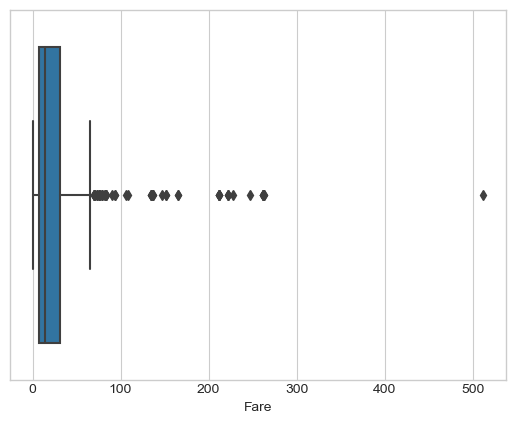

In [75]:
sns.boxplot(x = "Fare",data = df)

In [76]:
df[df["Fare"] >100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
64,956,0,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
74,966,1,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C
75,967,0,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
114,1006,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S
141,1033,1,1,"Daniels, Miss. Sarah",female,33.0,0,0,113781,151.5500,NaN,S


In [77]:
df["Fare"].isnull().sum()

1

In [78]:
df["Fare"].fillna(df["Fare"].median(),inplace = True)

In [79]:
df["Fare"].isnull().sum()

0

**Survived?** 

Most people did not survive

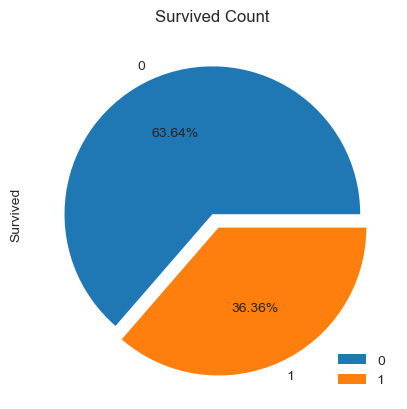

In [80]:
ax = [0.0,0.1]
df["Survived"].value_counts().plot(kind = "pie",autopct = "%1.2f%%",explode=ax)
plt.legend(loc = 4)
plt.title("Survived Count")
plt.show()

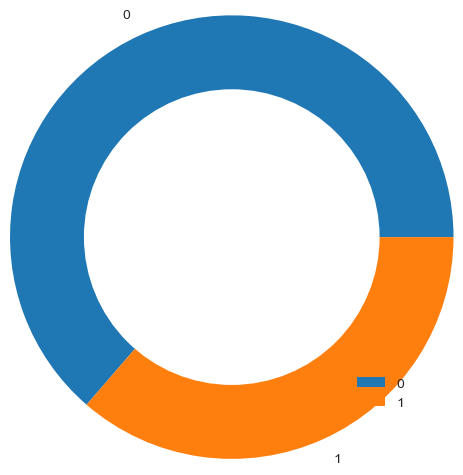

In [81]:
df["Survived"].value_counts().plot(kind = "pie",radius=1.5)
cr = plt.Circle(xy = (0,0),radius = 1, facecolor = "w")
plt.gca().add_artist(cr)
plt.legend(loc = 4)
# plt.title("Survived Count")
plt.show()

In [82]:
df["Survived"].isnull().sum()

0

**PClass**

Surprisingly less people travel in Pclass 2 and more people travel in Pclass 1

In [83]:
df["Pclass"].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Pclass Count')

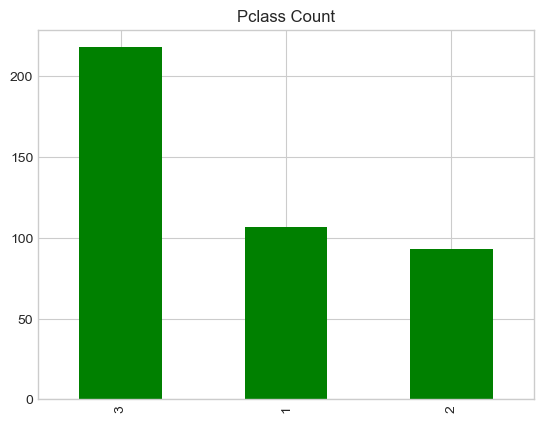

In [84]:
df["Pclass"].value_counts().plot(kind = "bar",color = "green")
plt.title("Pclass Count")

Text(0.5, 1.0, 'Pclass Count')

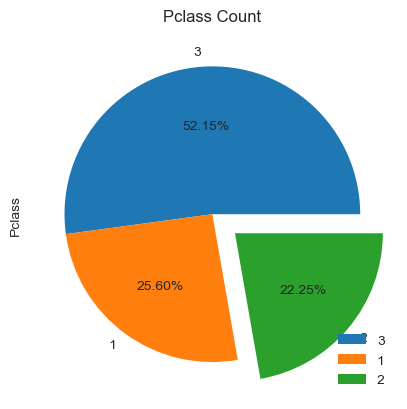

In [85]:
ax = [0.0,0.0,0.2]
df["Pclass"].value_counts().plot(kind = "pie",autopct = "%1.2f%%",explode=ax)
plt.legend(loc = 4)
plt.title("Pclass Count")

**Most travelers are Male**

<Axes: >

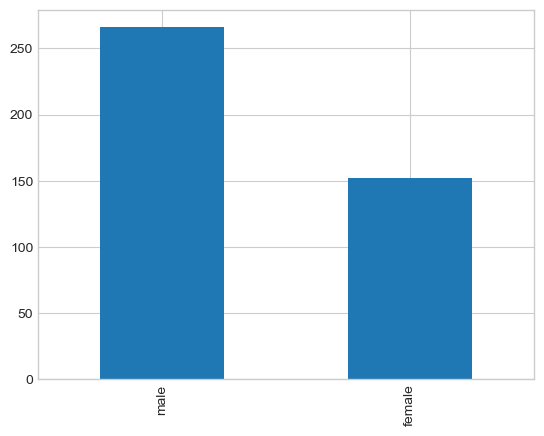

In [86]:
df['Sex'].value_counts().plot(kind = "bar")

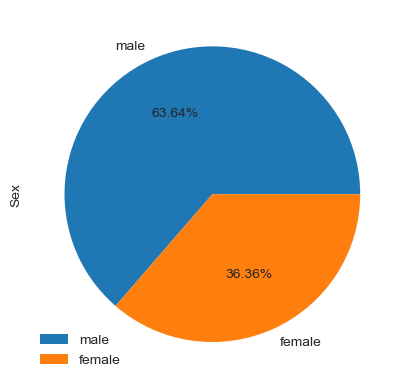

In [87]:
df['Sex'].value_counts().plot(kind = "pie",autopct = "%1.2f%%")
plt.legend(loc = 3)

In [88]:
df["Sex"].isnull().sum()

0

#### Most people travel alone

In [89]:
df["SibSp"].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

Text(0.5, 1.0, 'SibSp Count')

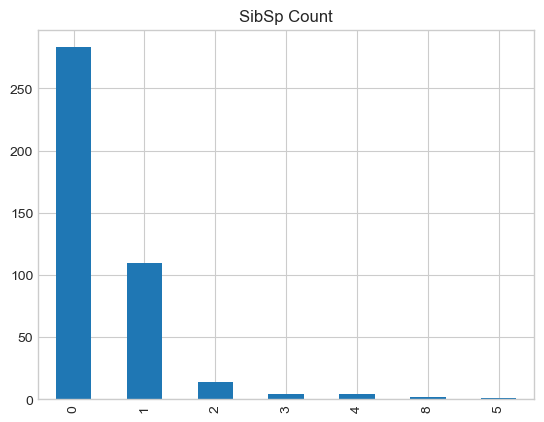

In [90]:
df["SibSp"].value_counts().plot(kind = "bar")
plt.title("SibSp Count")

<Axes: ylabel='SibSp'>

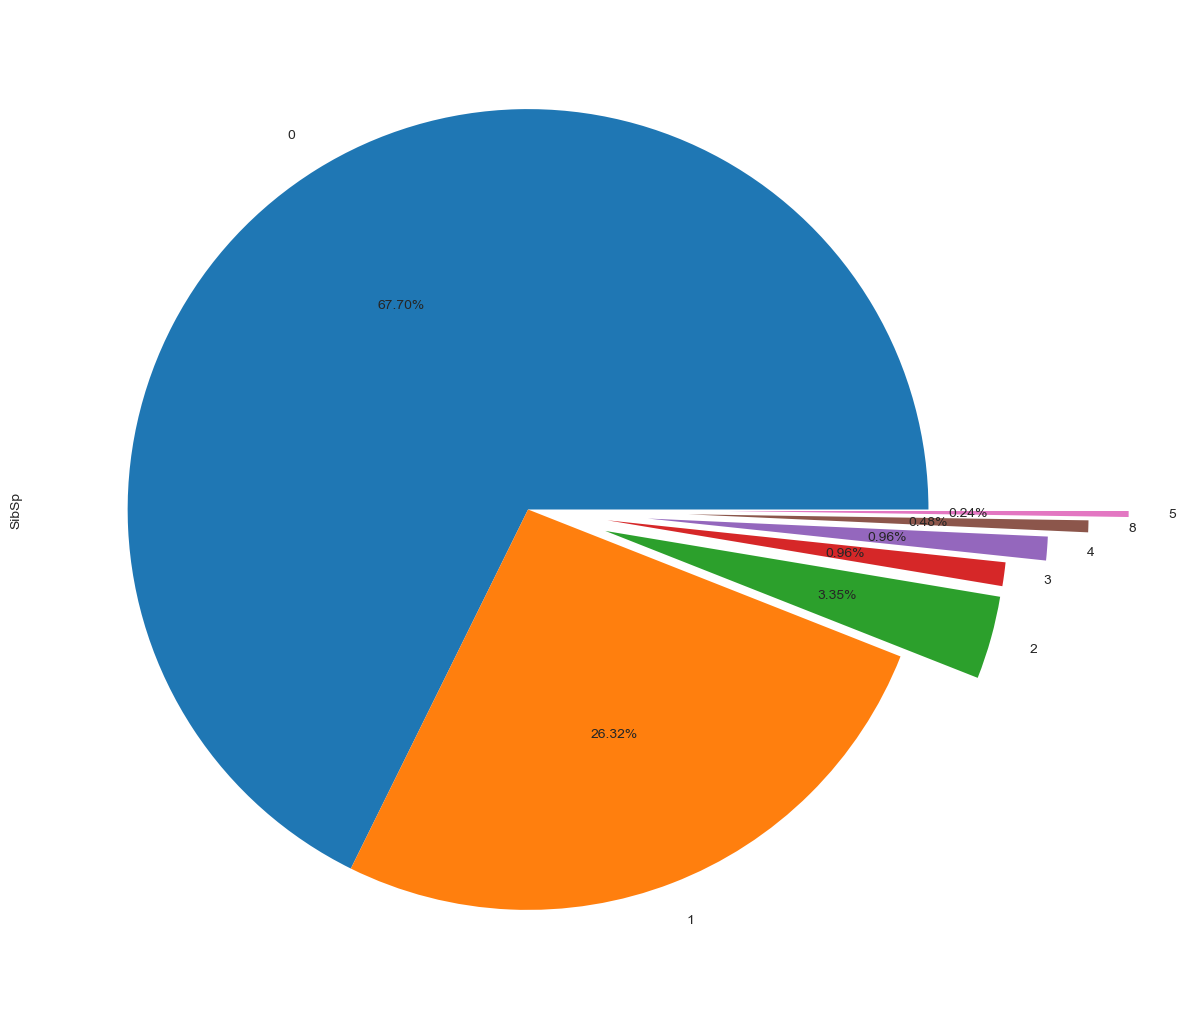

In [91]:
ax = [0.0,0.0,0.2,0.2,0.3,0.4,0.5]
plt.figure(figsize = (15,13))
df["SibSp"].value_counts().plot(kind = "pie",autopct = "%1.2f%%",explode=ax)

In [92]:
df["SibSp"].isnull().sum()

0

### Parch and SibSp column can be merged to form a new column called family_size

Let's go

**Create a new col called is_alone**

In [93]:
df["Parch"].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

<Axes: >

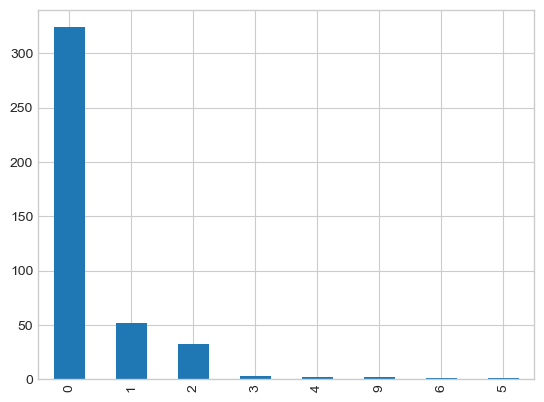

In [94]:
df["Parch"].value_counts().plot(kind = "bar")

<Axes: ylabel='Parch'>

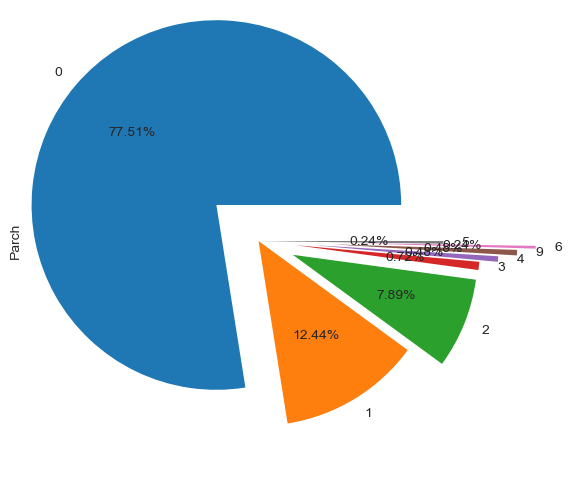

In [95]:
plt.figure(figsize = (8,6))
ax = [0.3,0.0,0.2,0.2,0.3,0.4,0.5,0.0]
df["Parch"].value_counts().plot(kind = "pie",autopct = "%1.2f%%",explode=ax)

In [96]:
df["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

<Axes: >

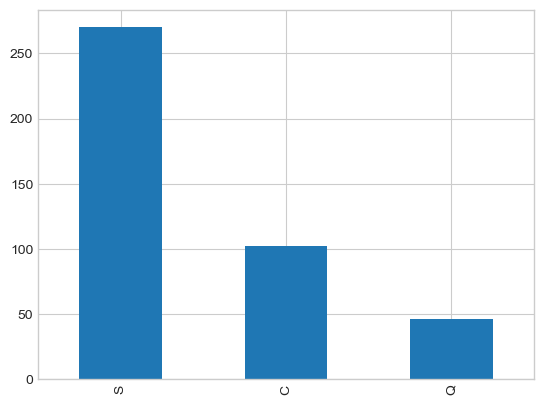

In [97]:
df["Embarked"].value_counts().plot(kind = "bar")

<Axes: ylabel='Embarked'>

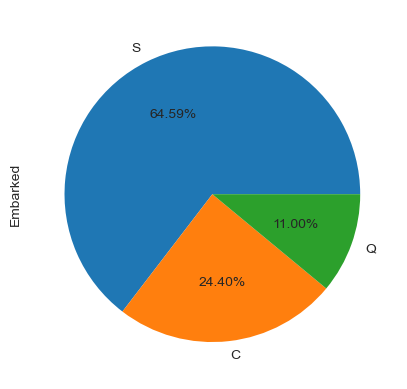

In [98]:
df["Embarked"].value_counts().plot(kind = "pie",autopct = "%1.2f%%")

In [99]:
pd.crosstab(df["Survived"],df["Pclass"],normalize = "columns")*100

Pclass,1,2,3
Survived,,,
0,53.271028,67.741935,66.972477
1,46.728972,32.258065,33.027523


<Axes: xlabel='Pclass', ylabel='Survived'>

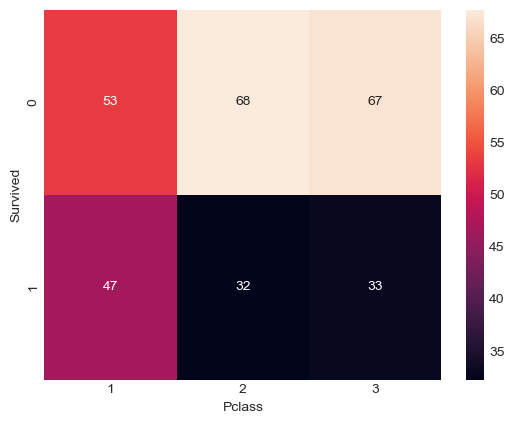

In [100]:
sns.heatmap(pd.crosstab(df["Survived"],df["Pclass"],normalize = "columns")*100,annot=True)

In [101]:
pd.crosstab(df["Survived"],df["Sex"],normalize = "columns")*100

Sex,female,male
Survived,,
0,0.0,100.0
1,100.0,0.0


In [102]:
pd.crosstab(df["Survived"],df["Embarked"],normalize = "columns")*100

Embarked,C,Q,S
Survived,,,
0,60.784314,47.826087,67.407407
1,39.215686,52.173913,32.592593


In [103]:
pd.crosstab(df["Sex"],df["Embarked"],normalize = "columns")*100

Embarked,C,Q,S
Sex,,,
female,39.215686,52.173913,32.592593
male,60.784314,47.826087,67.407407


In [104]:
pd.crosstab(df["Pclass"],df["Embarked"],normalize = "columns")*100

Embarked,C,Q,S
Pclass,,,
1,54.901961,2.173913,18.518519
2,10.784314,8.695652,28.888889
3,34.313725,89.130435,52.592593


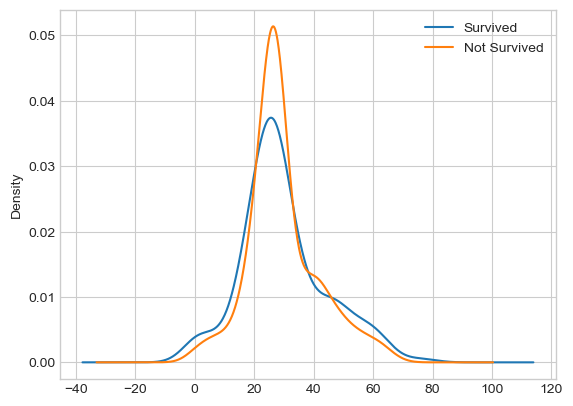

In [105]:
df[df["Survived"] == 1 ]["Age"].plot(kind = "kde",label="Survived")
df[df["Survived"] == 0 ]["Age"].plot(kind = "kde",label="Not Survived")
plt.legend()
plt.show()

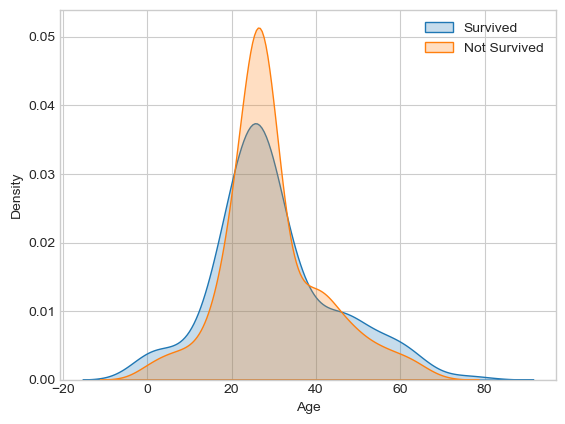

In [106]:
import seaborn as sns

sns.kdeplot(df[df["Survived"] == 1]["Age"], label="Survived", fill=True)
sns.kdeplot(df[df["Survived"] == 0]["Age"], label="Not Survived", fill=True)
plt.legend()
plt.show()

In [108]:
df[df["Pclass"] == 1]["Age"].median()

39.0

In [109]:
df[df["Pclass"] == 2]["Age"].median()

27.0

In [110]:
df[df["Pclass"] == 3]["Age"].median()

27.0

In [111]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Feature Engineering on Fare column

In [112]:
df["SibSp"].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [113]:
df[df["SibSp"] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,1,3,"Sage, Miss. Ada",female,27.0,8,2,CA. 2343,69.55,NaN,S
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [114]:
df["Ticket"].value_counts()

PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64

In [115]:
df[df["Ticket"] == "CA. 2343"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,1,3,"Sage, Miss. Ada",female,27.0,8,2,CA. 2343,69.55,NaN,S
342,1234,0,3,"Sage, Mr. John George",male,27.0,1,9,CA. 2343,69.55,NaN,S
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S
365,1257,1,3,"Sage, Mrs. John (Annie Bullen)",female,27.0,1,9,CA. 2343,69.55,NaN,S


In [116]:
df["individual_fare"] = df["Fare"]/(df["SibSp"] + df["Parch"] + 1)

<Axes: >

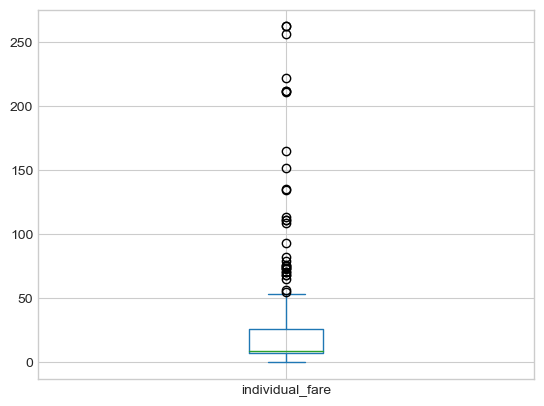

In [117]:
df["individual_fare"].plot(kind = "box")

In [118]:
df[["individual_fare","Fare"]].describe()

,individual_fare,Fare
count,418.000000,418.000000
mean,21.786577,35.576535
std,35.598822,55.850103
min,0.000000,0.000000
25%,7.634400,7.895800
50%,8.662500,14.454200
75%,25.982813,31.471875
max,262.375000,512.329200


In [119]:
df["family_size"] = df["SibSp"] + df["Parch"] + 1

In [120]:
def transform(num):
    if num == 1 :
        return "alone"
    elif num >1 and num <5:
        return "small"
    else:
        return "large"

In [121]:
df["family_type"] = df["family_size"].apply(transform)

In [122]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,7.829200,1,alone
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3.500000,2,small
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,9.687500,1,alone
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,8.662500,1,alone
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,4.095833,3,small


In [123]:
pd.crosstab(df["Survived"],df["family_type"],normalize = "columns")*100

family_type,alone,large,small
Survived,,,
0,73.12253,60.0,47.586207
1,26.87747,40.0,52.413793


<Axes: xlabel='family_type', ylabel='Survived'>

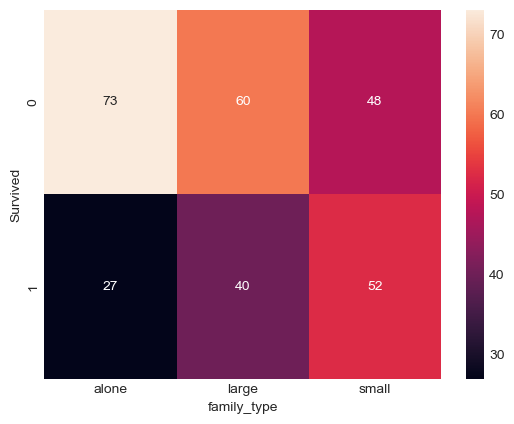

In [124]:
sns.heatmap(pd.crosstab(df["Survived"],df["family_type"],normalize = "columns")*100,annot=True)

In [125]:
df["surname"] = df["Name"].str.split(",").str.get(0)

In [126]:
df["title"] = df["Name"].str.split(",").str.get(1).str.strip().str.split(" ").str.get(0)

In [127]:
df["title"].value_counts()

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Col.         2
Rev.         2
Ms.          1
Dr.          1
Dona.        1
Name: title, dtype: int64

In [128]:
df["Cabin"].fillna("M",inplace = True)

In [129]:
df["Cabin"].value_counts()

M                  327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
                  ... 
E45                  1
E52                  1
B58 B60              1
C62 C64              1
C105                 1
Name: Cabin, Length: 77, dtype: int64

In [130]:
df["deck"] = df["Cabin"].str[0]

In [131]:
df["deck"].value_counts()

M    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: deck, dtype: int64

In [132]:
pd.crosstab(df["deck"],df["Pclass"])

Pclass,1,2,3
deck,,,
A,7,0,0
B,18,0,0
C,35,0,0
D,11,2,0
E,9,0,0
F,0,5,3
G,0,0,1
M,27,86,214


In [133]:
pd.crosstab(df["Survived"],df["deck"],normalize = "columns")

deck,A,B,C,D,E,F,G,M
Survived,,,,,,,,
0,0.571429,0.5,0.457143,0.615385,0.555556,0.625,0.0,0.669725
1,0.428571,0.5,0.542857,0.384615,0.444444,0.375,1.0,0.330275


<Axes: xlabel='deck'>

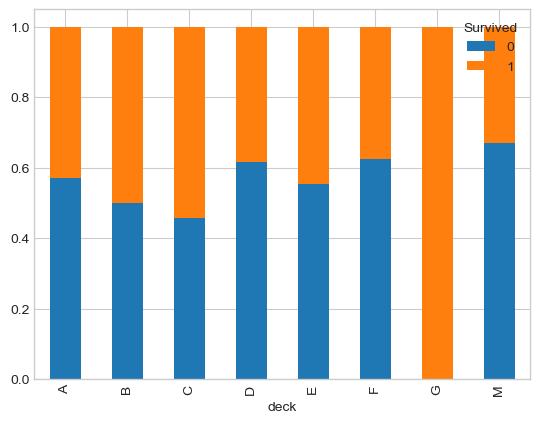

In [134]:
pd.crosstab(df["deck"],df["Survived"],normalize = "index").plot(kind = "bar",stacked = True)

<Axes: >

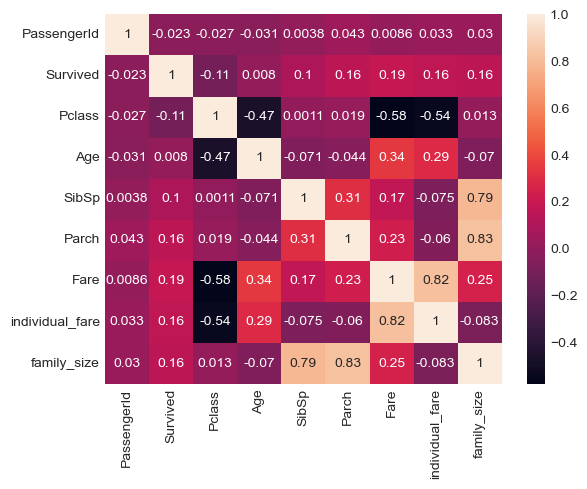

In [135]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot = True)

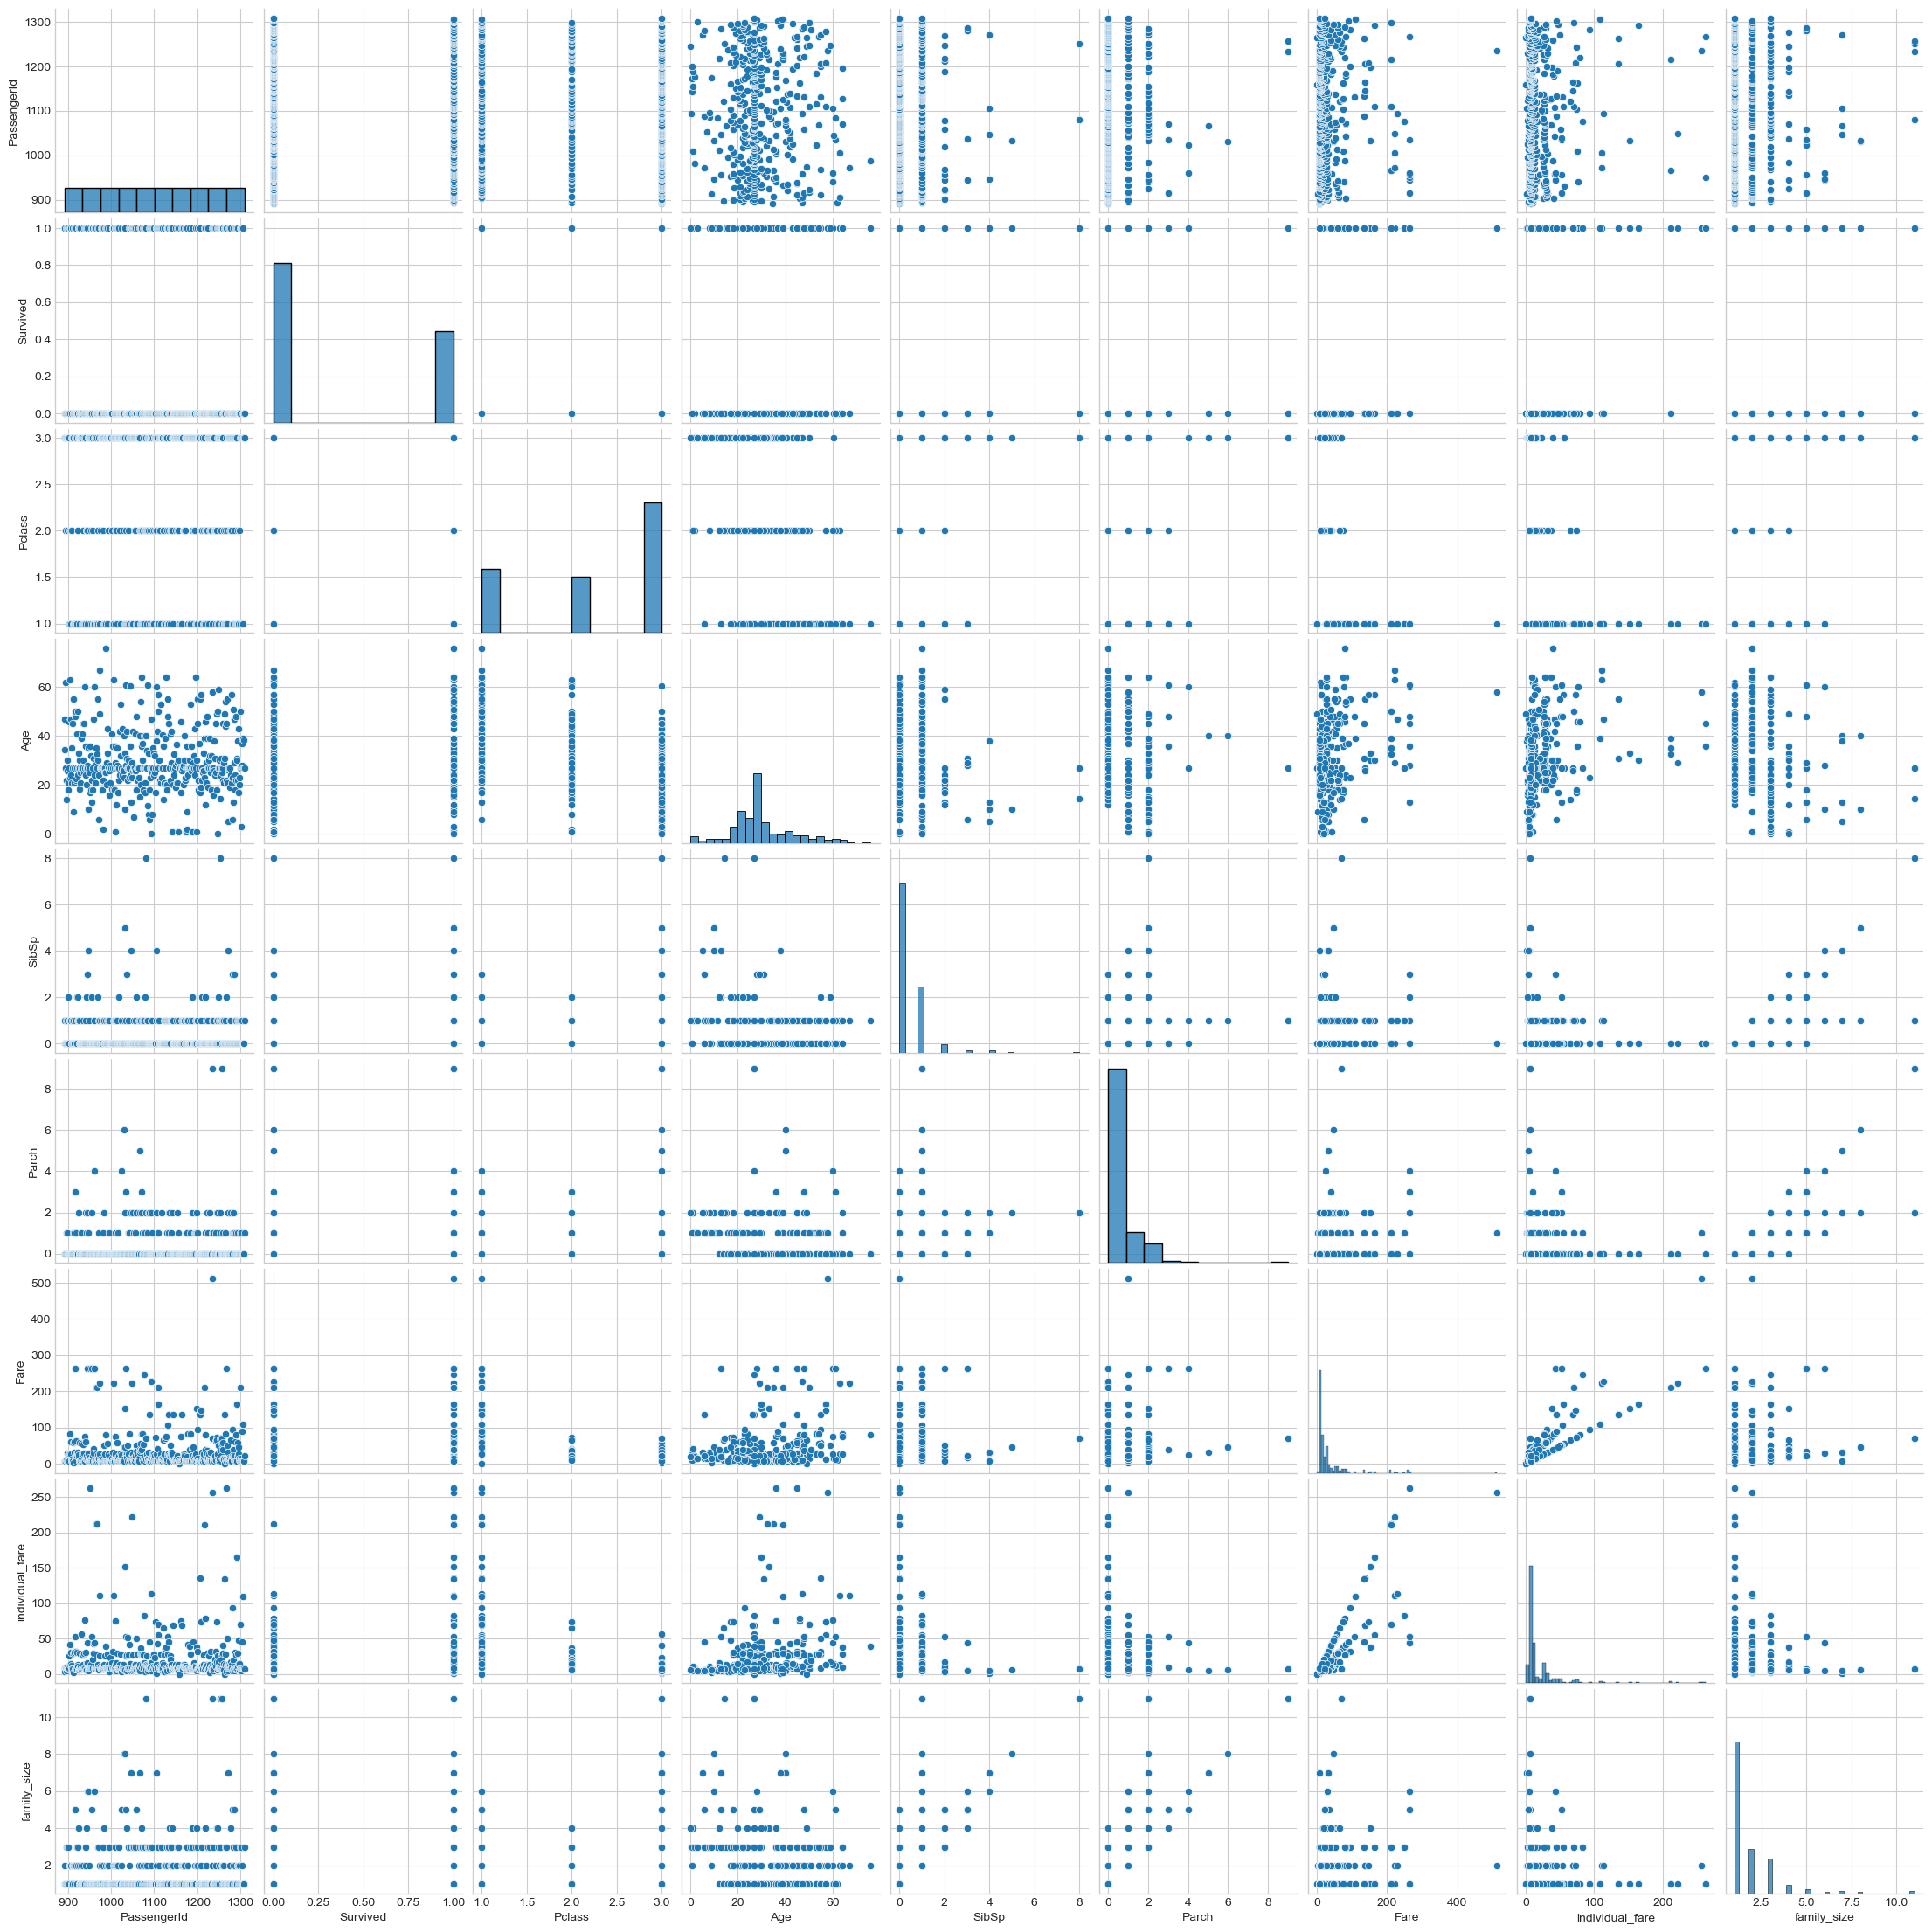

In [136]:
sns.pairplot(df)